In [1]:
import re 
import sys
import os
sys.path.append(os.path.abspath(os.path.join("../scripts")))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plots 
# loading data set from csv file
sw_df = pd.read_csv("../Data/Swahili-Data-sets-ava/TZ_Swahili_Data/text/metadata_TZ_.csv")
kny_df = pd.read_csv("../Data/Swahili-Data-sets-ava/Kenyan_Swahili_Data/text/metadata_KNY1.csv", encoding='mac-roman')
# display(sw_df)
display(kny_df)



,filename,transcription,filepath,sample_rate,duration
0,KISWA-00001,Kenya yageuka taifa lililojaa matapeli ndani n...,KISWA-00001,1600,NaN
1,KISWA-00002,NCHI YA WAKORA. Waziri arekebisha kosa lake la...,KISWA-00002,1600,NaN
2,KISWA-00003,WAZIRI wa Teknolojia Habari na Mawasilino,KISWA-00003,1600,NaN
3,KISWA-00004,Bw Mucheru alifutilia mbali uteuzi wa marehemu...,KISWA-00004,1600,NaN
4,KISWA-00005,Bw alipomteua Kochalle aliyeaga dunia mnamo Me...,KISWA-00005,1600,NaN
...,...,...,...,...,...
1554,KISWA-01566,NaN,KISWA-01566,1600,NaN
1555,KISWA-01567,NaN,KISWA-01567,1600,NaN
1556,KISWA-01568,NaN,KISWA-01568,1600,NaN
1557,KISWA-01569,NaN,KISWA-01569,1600,NaN


In [2]:
# viewing how many values we have in the sample rate column of our dataset
sw_df['sample_rate'].value_counts()


sample_rate
16000    10180
Name: count, dtype: int64

In [3]:
# viewing data information 
sw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       10180 non-null  object 
 1   transcription  10180 non-null  object 
 2   filepath       10180 non-null  object 
 3   sample_rate    10180 non-null  int64  
 4   duration       10180 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 397.8+ KB


In [4]:
# selecting two columns for detecting any outliers in the audio and text fies related
dur_sw_df = sw_df[['duration', 'filename']]

In [5]:
dur_sw_df.describe()

,duration
count,10180.000000
mean,3.504845
std,1.024975
min,2.159750
25%,2.650000
50%,3.279906
75%,4.179953
max,6.150000


The maximum duration is 6.1 seconds

The Minimum duration is 2.1 seconds

<Figure size 900x700 with 0 Axes>

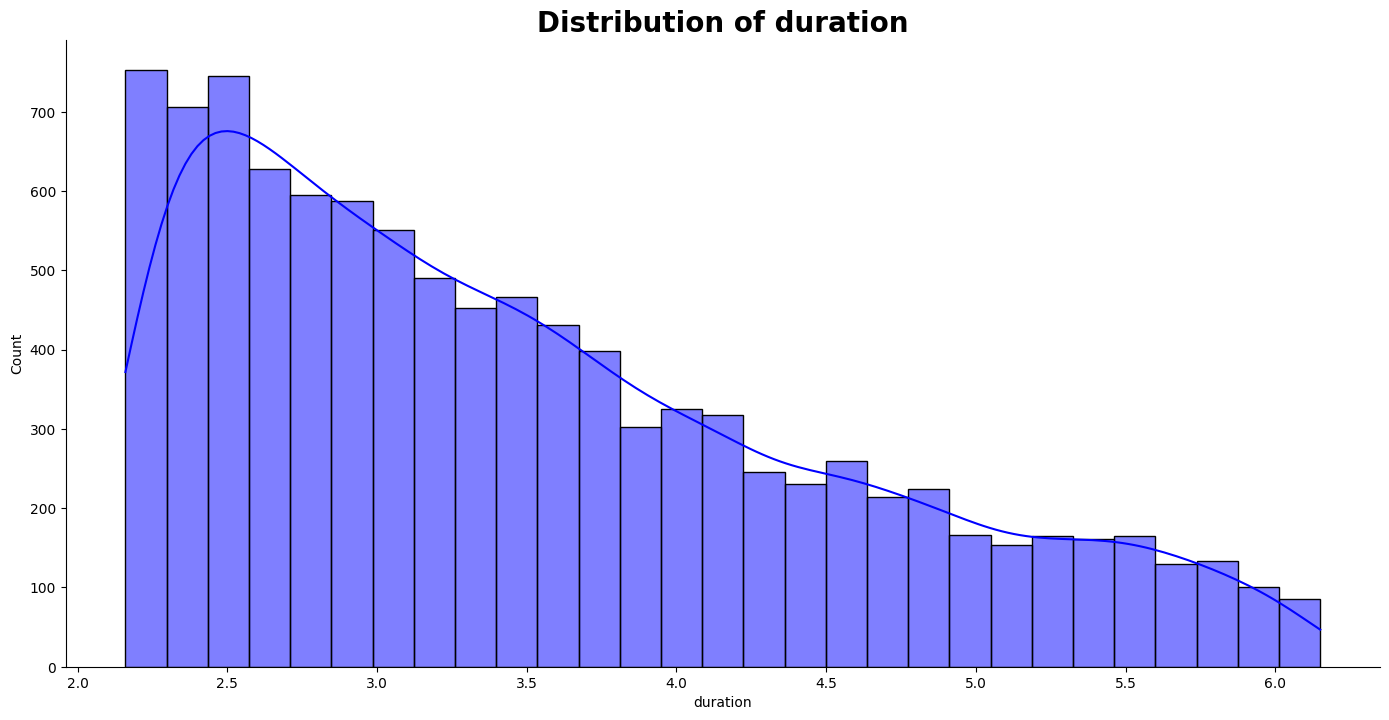

In [6]:
# the distribution of the duration shown in a histplot
plots.plot_hist(dur_sw_df, 'duration', 'blue')


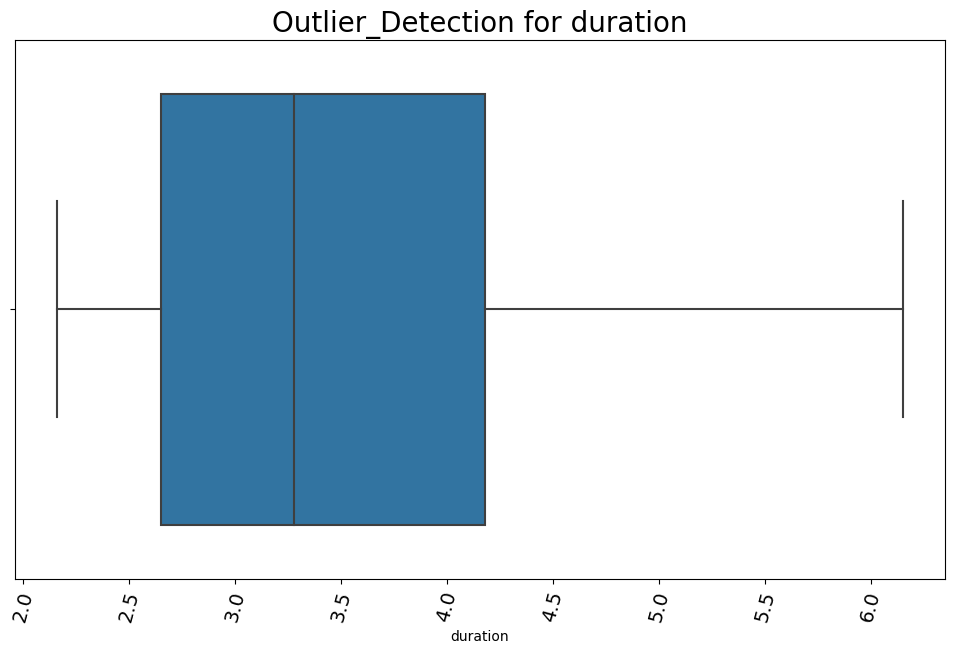

In [7]:
plots.plot_box(dur_sw_df, 'duration', 'Outlier_Detection for duration')

The Above plot shows us that there are no outliers.

Pre Processing using regular expression...

In [9]:
#  Removing any empty spaces in the data set specifically transcription column

for transcription in sw_df:
   sw_df['transcription'] = sw_df['transcription'].str.replace(r'<UNK>.*\S',' ',regex=True)   

sw_df.to_csv('Text/metadata_analyzed_1.csv')